<a href="https://colab.research.google.com/github/stuthikathula/pharmacy-stock1/blob/main/project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix

# read an excel file and convert
# into a dataframe object
df = pd.DataFrame(pd.read_excel("dataset.xlsx"))

# show the dataframe
df


,MEDICINE-NAME,CURRENT STOCK,DEMAND,LEAD TIME
0,Abacavir,53,20,7
1,Abilify,33,20,8
2,Accutane,36,43,1
3,Acetaminophen,37,23,1
4,Acetylcysteine,46,31,3
...,...,...,...,...
666,Zolpidem,36,46,8
667,Zonisamide,60,40,3
668,Zoledronic Acid,34,34,8
669,Zotepine,55,34,2


# New Section

In [ ]:
df.head()

,MEDICINE-NAME,CURRENT STOCK,DEMAND,LEAD TIME
0,Abacavir,53,20,7
1,Abilify,33,20,8
2,Accutane,36,43,1
3,Acetaminophen,37,23,1
4,Acetylcysteine,46,31,3


In [ ]:
df.tail()

,MEDICINE-NAME,CURRENT STOCK,DEMAND,LEAD TIME
666,Zolpidem,36,46,8
667,Zonisamide,60,40,3
668,Zoledronic Acid,34,34,8
669,Zotepine,55,34,2
670,Zuclopenthixol,44,29,5


In [ ]:
df.shape

(671, 4)

In [ ]:
df.columns

Index(['MEDICINE-NAME', 'CURRENT STOCK', 'DEMAND', 'LEAD TIME'], dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 671 entries, 0 to 670
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MEDICINE-NAME  671 non-null    object
 1   CURRENT STOCK  671 non-null    int64 
 2   DEMAND         671 non-null    int64 
 3   LEAD TIME      671 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 21.1+ KB


In [ ]:
df.describe()

,CURRENT STOCK,DEMAND,LEAD TIME
count,671.000000,671.000000,671.000000
mean,40.059613,30.441133,5.569300
std,11.740199,11.883478,2.848023
min,20.000000,10.000000,1.000000
25%,30.000000,20.000000,3.000000
50%,40.000000,30.000000,6.000000
75%,50.000000,41.000000,8.000000
max,60.000000,50.000000,10.000000


In [ ]:
df.isnull().sum()

MEDICINE-NAME    0
CURRENT STOCK    0
DEMAND           0
LEAD TIME        0
dtype: int64

In [ ]:
current_stock = df['CURRENT STOCK']
demand_stock = df['DEMAND']
medicine_names = df['MEDICINE-NAME']
lead_time = df['LEAD TIME']

In [ ]:
df['Prediction'] = current_stock-demand_stock*lead_time

# Label whether it's understock or overstock
df['Stock Status'] = df['Prediction'].apply(lambda x: 'Understock' if x < 0 else 'Overstock')

print(df)


       MEDICINE-NAME  CURRENT STOCK  DEMAND  LEAD TIME  Prediction  \
0           Abacavir             53      20          7         -87   
1            Abilify             33      20          8        -127   
2           Accutane             36      43          1          -7   
3      Acetaminophen             37      23          1          14   
4     Acetylcysteine             46      31          3         -47   
..               ...            ...     ...        ...         ...   
666         Zolpidem             36      46          8        -332   
667       Zonisamide             60      40          3         -60   
668  Zoledronic Acid             34      34          8        -238   
669         Zotepine             55      34          2         -13   
670   Zuclopenthixol             44      29          5        -101   

    Stock Status  
0     Understock  
1     Understock  
2     Understock  
3      Overstock  
4     Understock  
..           ...  
666   Understock  
667   U

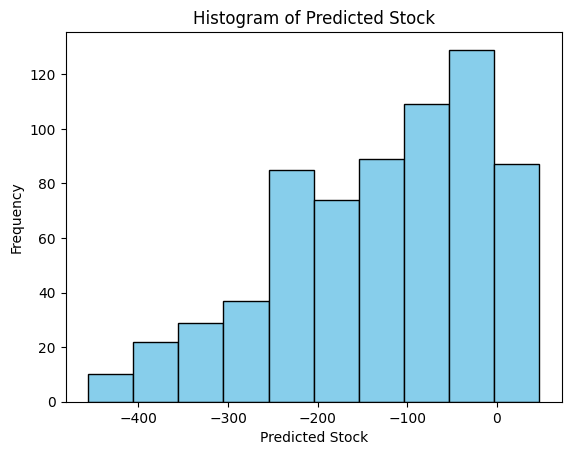

In [ ]:
import matplotlib.pyplot as plt

# Histogram
plt.hist(df['Prediction'], bins=10, color='skyblue', edgecolor='black')
plt.xlabel('Predicted Stock')
plt.ylabel('Frequency')
plt.title('Histogram of Predicted Stock')
plt.show()